In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
import pandas as pd
import random
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
import numpy as np
from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from tensorflow.keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.models import Model
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
x = np.load('/content/drive/MyDrive/Datasets/fold1/images.npy')
y = np.load('/content/drive/MyDrive/Datasets/fold1/types.npy')


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 0)


In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(2124, 256, 256, 3) (2124,)
(532, 256, 256, 3) (532,)


In [20]:
#encoding y_train

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#print(onehot_encoded)

y_train = onehot_encoded

[15  3 12 ...  5  1  5]


In [21]:
#encoding y_test

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_test)
#print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#print(onehot_encoded)

y_test = onehot_encoded

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state= 0)

In [9]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(1911, 256, 256, 3) (1911, 19)
(213, 256, 256, 3) (213, 19)
(532, 256, 256, 3) (532, 19)


**REsNet50 using for folder 1**

In [ ]:
#@title Default title text
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1 )
train_generator.fit(x_train)
val_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)
val_generator.fit(x_val)
test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)
test_generator.fit(x_test)
#Initializing ResNet50
from tensorflow.keras.applications import ResNet50
base_model_resnet = ResNet50(include_top = False, weights = 'imagenet', input_shape = (256,256,3))
#Adding layers to the ResNet50
model_resnet= Sequential()
#Add the Dense layers along with activation and batch normalization
model_resnet.add(base_model_resnet)
model_resnet.add(Flatten())
#Add the Dense layers along with activation and batch normalization
model_resnet.add(Dense(1024,activation=('relu'), input_dim=512))
model_resnet.add(Dense(512,activation=('relu'))) 
model_resnet.add(Dropout(.4))
model_resnet.add(Dense(256,activation=('relu'))) 
model_resnet.add(Dropout(.3))
model_resnet.add(Dense(128,activation=('relu')))
model_resnet.add(Dropout(.2))
model_resnet.add(Dense(19,activation=('softmax')))
#model_resnet.summary()
from tensorflow.keras.optimizers import SGD
model_resnet.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Training the ResNet50 model
rest_net_history = model_resnet.fit(x_train ,y_train, epochs=35, validation_data =(x_val, y_val), verbose=1)
test_score = model_resnet.evaluate(x_test, y_test, verbose = 1) 


Epoch 1/35
60/60 [==============================] - 192s 3s/step - loss: 2.1548 - accuracy: 0.4123 - val_loss: 2.4256 - val_accuracy: 0.2441
Epoch 2/35
60/60 [==============================] - 183s 3s/step - loss: 1.5806 - accuracy: 0.5280 - val_loss: 1.8715 - val_accuracy: 0.4131
Epoch 3/35
60/60 [==============================] - 183s 3s/step - loss: 1.3727 - accuracy: 0.5986 - val_loss: 2.0351 - val_accuracy: 0.3474
Epoch 4/35
60/60 [==============================] - 183s 3s/step - loss: 1.0885 - accuracy: 0.6787 - val_loss: 1.8233 - val_accuracy: 0.4977
Epoch 5/35
60/60 [==============================] - 182s 3s/step - loss: 0.8294 - accuracy: 0.7462 - val_loss: 1.5711 - val_accuracy: 0.5493
Epoch 6/35
60/60 [==============================] - 182s 3s/step - loss: 0.6369 - accuracy: 0.8095 - val_loss: 1.6056 - val_accuracy: 0.6479
Epoch 7/35
60/60 [==============================] - 183s 3s/step - loss: 0.4182 - accuracy: 0.8755 - val_loss: 1.0584 - val_accuracy: 0.7371
Epoch 8/35
60

In [ ]:
model_resnet.save('resnet50 fold1.h5')

**resNet50 with 50 epoch**

In [10]:
#@title Default title text
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1 )
train_generator.fit(x_train)
val_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)
val_generator.fit(x_val)
test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)
test_generator.fit(x_test)
#Initializing ResNet50
from tensorflow.keras.applications import ResNet50
base_model_resnet = ResNet50(include_top = False, weights = 'imagenet', input_shape = (256,256,3))
#Adding layers to the ResNet50
model_resnet= Sequential()
#Add the Dense layers along with activation and batch normalization
model_resnet.add(base_model_resnet)
model_resnet.add(Flatten())
#Add the Dense layers along with activation and batch normalization
model_resnet.add(Dense(1024,activation=('relu'), input_dim=512))
model_resnet.add(Dense(512,activation=('relu'))) 
model_resnet.add(Dropout(.4))
model_resnet.add(Dense(256,activation=('relu'))) 
model_resnet.add(Dropout(.3))
model_resnet.add(Dense(128,activation=('relu')))
model_resnet.add(Dropout(.2))
model_resnet.add(Dense(19,activation=('softmax')))
#model_resnet.summary()
from tensorflow.keras.optimizers import SGD
model_resnet.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Training the ResNet50 model
rest_net_history = model_resnet.fit(x_train ,y_train, epochs=50, validation_data =(x_val, y_val), verbose=1)
test_score = model_resnet.evaluate(x_test, y_test, verbose = 1) 


94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/50
60/60 [==============================] - 246s 4s/step - loss: 2.1758 - accuracy: 0.4050 - val_loss: 4.1077 - val_accuracy: 0.2488
Epoch 2/50
60/60 [==============================] - 234s 4s/step - loss: 1.5931 - accuracy: 0.5201 - val_loss: 3.4968 - val_accuracy: 0.2488
Epoch 3/50
60/60 [==============================] - 232s 4s/step - loss: 1.3530 - accuracy: 0.5814 - val_loss: 2.9908 - val_accuracy: 0.3239
Epoch 4/50
60/60 [==============================] - 233s 4s/step - loss: 1.1362 - accuracy: 0.6525 - val_loss: 1.7060 - val_accuracy: 0.5634
Epoch 5/50
60/60 [==============================] - 234s 4s/step - loss: 0.8669 - accuracy: 0.7368 - val_loss: 1.8135 - val_accuracy: 0.5211
Epoch 6/50
60/60 [==============================] - 234s 4s/step - loss: 0.6498 - accuracy: 0.8017 - val_loss: 1.1294 - val_accuracy: 0.6948
Epoch 7/50
60/60 [==============================] - 234s 4s/step - loss: 0.4265 - accurac

**Vgg19 model**

In [ ]:
#@title Default title text

from keras.applications.vgg19 import VGG19

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	# model.summary()
	return model

# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True, rotation_range=2, zoom_range=.2)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size = 128, epochs = 40, verbose = 1, validation_data = (x_val, y_val))

	# evaluate model
	acc = model.evaluate(x_test, y_test, verbose=1)
	
	model.save('vgg19 fold1.h5')


run_test_harness()

80150528/80134624 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/40
15/15 [==============================] - 100s 7s/step - loss: 7.8279 - accuracy: 0.2344 - val_loss: 3.0624 - val_accuracy: 0.3568
Epoch 2/40
15/15 [==============================] - 98s 7s/step - loss: 2.2004 - accuracy: 0.3946 - val_loss: 2.2882 - val_accuracy: 0.3897
Epoch 3/40
15/15 [==============================] - 96s 6s/step - loss: 1.6871 - accuracy: 0.5065 - val_loss: 2.1525 - val_accuracy: 0.4460
Epoch 4/40
15/15 [==============================] - 96s 6s/step - loss: 1.3887 - accuracy: 0.5693 - val_loss: 2.1631 - val_accuracy: 0.4601
Epoch 5/40
15/15 [==============================] - 96s 6s/step - loss: 1.1542 - accuracy: 0.6264 - val_loss: 2.2043 - val_accuracy: 0.4836
Epoch 6/40
15/15 [==============================] - 96s 6s/step - loss: 0.9848 - accuracy: 0.6886 - val_loss: 2.2235 - val_accuracy: 0.4789
Epoch 7/40
15/15 [==============================] - 95s 6s/step - loss: 0.8446 - accuracy: 0.7305 - val_loss: 2.2681 - val_accuracy: 0.4930
Epoch 8/40
15/15 [=

In [12]:
#@title Vgg19 with 50 epoch

from keras.applications.vgg19 import VGG19

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	# model.summary()
	return model

# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True, rotation_range=2, zoom_range=.2)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size = 128, epochs = 50, verbose = 1, validation_data = (x_val, y_val))

	# evaluate model
	acc = model.evaluate(x_test, y_test, verbose=1)
	
	model.save('vgg19 fold1.h5')


run_test_harness()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
15/15 [==============================] - 101s 7s/step - loss: 7.9043 - accuracy: 0.2564 - val_loss: 3.4776 - val_accuracy: 0.3521
Epoch 2/50
15/15 [==============================] - 96s 6s/step - loss: 2.1692 - accuracy: 0.4129 - val_loss: 2.4133 - val_accuracy: 0.3944
Epoch 3/50
15/15 [==============================] - 99s 7s/step - loss: 1.6525 - accuracy: 0.5076 - val_loss: 2.3893 - val_accuracy: 0.4366
Epoch 4/50
15/15 [==============================] - 99s 7s/step - loss: 1.3455 - accuracy: 0.5850 - val_loss: 2.3088 - val_accuracy: 0.4695
Epoch 5/50
15/15 [==============================] - 99s 7s/step - loss: 1.1035 - accuracy: 0.6515 - val_loss: 2.3909 - val_accuracy: 0.4789
Epoch 6/50
15/15 [==============================] - 99s 7s/step - loss: 0.9109 - accuracy: 0.7122 - val_loss: 2.3694 - val_accuracy: 0.4789
Epoch 7/50
15/15 [==============================] - 100s 7s/step - loss: 0.7657 - accuracy: 0.7682 - val_loss: 2.3942 - val_accuracy: 0.5070
Epoch 8/50
15/15 [

**Vgg16 fold 1**

In [13]:
#@title Default title text
# from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import VGG16

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True,zoom_range=.1)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=50, verbose=1, validation_data = (x_val, y_val))
	# evaluate model
	acc = model.evaluate(x_test, y_test, verbose=1)
	
	# save model
	model.save('vgg16 fold1.h5')


run_test_harness()

58900480/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
60/60 [==============================] - 84s 1s/step - loss: 4.3059 - accuracy: 0.3087 - val_loss: 1.9689 - val_accuracy: 0.4319
Epoch 2/50
60/60 [==============================] - 82s 1s/step - loss: 1.6501 - accuracy: 0.4898 - val_loss: 1.8549 - val_accuracy: 0.4695
Epoch 3/50
60/60 [==============================] - 81s 1s/step - loss: 1.4011 - accuracy: 0.5400 - val_loss: 1.7959 - val_accuracy: 0.4977
Epoch 4/50
60/60 [==============================] - 81s 1s/step - loss: 1.2488 - accuracy: 0.5877 - val_loss: 1.7941 - val_accuracy: 0.5023
Epoch 5/50
60/60 [==============================] - 82s 1s/step - loss: 1.1299 - accuracy: 0.6222 - val_loss: 1.8824 - val_accuracy: 0.4977
Epoch 6/50
60/60 [==============================] - 82s 1s/step - loss: 1.0339 - accuracy: 0.6457 - val_loss: 1.9810 - val_accuracy: 0.4977
Epoch 7/50
60/60 [==============================] - 81s 1s/step - loss: 0.9409 - accuracy: 0.6630 - val_loss: 1.9009 - val_accuracy: 0.4977
Epoch 8/50
60/60 [==

**DenseNet fold1**

In [10]:
#@title Default title text
import tensorflow as tf
base_model_denseNet= tf.keras.applications.DenseNet169(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256,256,3),
    pooling=None,
    classes=y_train.shape[1],
    
)
#Adding layers to the ResNet50
model_dense=Sequential()
#Add the Dense layers along with activation and batch normalization
model_dense.add(base_model_denseNet)
model_dense.add(Flatten())
#Add the Dense layers along with activation and batch normalization
# model_dense.add(Dense(1024,activation=('relu'), input_dim=512))
model_dense.add(Dense(512,activation=('relu'))) 
model_dense.add(Dropout(.4))
model_dense.add(Dense(256,activation=('relu'))) 
model_dense.add(Dropout(.3))
model_dense.add(Dense(128,activation=('relu')))
model_dense.add(Dropout(.2))
model_dense.add(Dense(19,activation=('softmax')))

from tensorflow.keras.optimizers import SGD
model_dense.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
dense_net_history = model_dense.fit(x_train, y_train, epochs=50, validation_data = (x_test, y_test), verbose=1)
score = model_dense.evaluate(x_test, y_test, verbose= 1)

51888128/51877672 [==============================] - 0s 0us/step
Epoch 1/50
60/60 [==============================] - 518s 8s/step - loss: 2.2779 - accuracy: 0.3789 - val_loss: 3.2806 - val_accuracy: 0.1711
Epoch 2/50
60/60 [==============================] - 500s 8s/step - loss: 1.6210 - accuracy: 0.5076 - val_loss: 2.9313 - val_accuracy: 0.2124
Epoch 3/50
60/60 [==============================] - 461s 8s/step - loss: 1.5267 - accuracy: 0.5416 - val_loss: 2.1283 - val_accuracy: 0.3891
Epoch 4/50
60/60 [==============================] - 421s 7s/step - loss: 1.3485 - accuracy: 0.5913 - val_loss: 1.4297 - val_accuracy: 0.5583
Epoch 5/50
60/60 [==============================] - 418s 7s/step - loss: 1.2100 - accuracy: 0.6238 - val_loss: 1.3450 - val_accuracy: 0.5959
Epoch 6/50
60/60 [==============================] - 424s 7s/step - loss: 1.0475 - accuracy: 0.6897 - val_loss: 1.2672 - val_accuracy: 0.6335
Epoch 7/50
60/60 [==============================] - 464s 8s/step - loss: 0.9490 - accurac

In [4]:
#First Spliting the dataset into three parts
x_train1, x_train3, y_train1, y_train3 = train_test_split(x,y, test_size=.33, random_state=0)
x_train1, x_train2, y_train1, y_train2 = train_test_split(x_train1, y_train1, test_size=.50, random_state=0)

In [5]:
#Now printing the shape and size of three parts
print(x_train1.shape, y_train1.shape)
print(x_train2.shape, y_train2.shape)
print(x_train3.shape, y_train3.shape)

(889, 256, 256, 3) (889,)
(890, 256, 256, 3) (890,)
(877, 256, 256, 3) (877,)


In [6]:
#encoding y_train1

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train1)
#print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#print(onehot_encoded)

y_train1 = onehot_encoded

In [7]:
#encoding y_train2

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train2)
#print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#print(onehot_encoded)

y_train2 = onehot_encoded

In [8]:
#encoding y_train3

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train3)
#print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#print(onehot_encoded)

y_train3 = onehot_encoded

In [9]:
#Now printing the shape and size of three parts
print(x_train1.shape, y_train1.shape)
print(x_train2.shape, y_train2.shape)
print(x_train3.shape, y_train3.shape)

(889, 256, 256, 3) (889, 19)
(890, 256, 256, 3) (890, 19)
(877, 256, 256, 3) (877, 19)


In [10]:
# spliting x_train1 and y_train1 into train , validation and test set
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train1, y_train1, test_size=.2, random_state=1)
x_train1, x_val1, y_train1, y_val1 = train_test_split(x_train1, y_train1, test_size=.1, random_state=1)

#printing the shape
print("................printing the sahpe..............")
print(x_train1.shape, y_train1.shape)
print(x_val1.shape, y_val1.shape)
print(x_test1.shape, y_test1.shape)

................printing the sahpe..............
(639, 256, 256, 3) (639, 19)
(72, 256, 256, 3) (72, 19)
(178, 256, 256, 3) (178, 19)


In [11]:
# spliting x_train2 and y_train2 into train , validation and test set
x_train2, x_val2, y_train2, y_val2 = train_test_split(x_train2, y_train2, test_size=.1, random_state=1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train2, y_train2, test_size=.2, random_state=1)
#printing the shape
print("printing the sahpe..............")
print(x_train2.shape, y_train2.shape)
print(x_val2.shape, y_val2.shape)
print(x_test2.shape, y_test2.shape)

printing the sahpe..............
(640, 256, 256, 3) (640, 19)
(89, 256, 256, 3) (89, 19)
(161, 256, 256, 3) (161, 19)


In [12]:
# spliting x_train3 and y_train3 into train , validation and test set
x_train3, x_val3, y_train3, y_val3 = train_test_split(x_train3, y_train3, test_size=.1, random_state=1)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_train3, y_train3, test_size=.2, random_state=1)
#printing the shape
print("printing the sahpe..............")
print(x_train3.shape, y_train3.shape)
print(x_val3.shape, y_val3.shape)
print(x_test3.shape, y_test3.shape)

printing the sahpe..............
(631, 256, 256, 3) (631, 19)
(88, 256, 256, 3) (88, 19)
(158, 256, 256, 3) (158, 19)


**ResNet50 Model for ensembling, fold 1**

In [13]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import SGD
base_model_resnet = ResNet50(include_top = False, weights = 'imagenet', input_shape = (256,256,3))

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1 )
train_generator.fit(x_train1)
val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1 )
val_generator.fit(x_val1)
test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)
test_generator.fit(x_test1)


#Adding layers to the ResNet50
model_resnet= Sequential()
#Add the Dense layers along with activation and batch normalization
model_resnet.add(base_model_resnet)
model_resnet.add(Flatten())
#Add the Dense layers along with activation and batch normalization
model_resnet.add(Dense(1024,activation=('relu'), input_dim=512))
model_resnet.add(Dense(512,activation=('relu'))) 
model_resnet.add(Dropout(.4))
model_resnet.add(Dense(256,activation=('relu'))) 
model_resnet.add(Dropout(.3))
model_resnet.add(Dense(128,activation=('relu')))
model_resnet.add(Dropout(.2))
model_resnet.add(Dense(19,activation=('softmax')))

#Summary of ResNet50 Model
#model_resnet.summary()

model_resnet.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Training the ResNet50 model
rest_net_history = model_resnet.fit(x_train1 ,y_train1, epochs=50, validation_data =(x_val1, y_val1), verbose=1)
score = model_resnet.evaluate(x_test1, y_test1, verbose=1)
model_resnet.save('resNet50-fold1.h5')

94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/50
20/20 [==============================] - 74s 3s/step - loss: 2.5604 - accuracy: 0.3537 - val_loss: 2.6066 - val_accuracy: 0.1944
Epoch 2/50
20/20 [==============================] - 65s 3s/step - loss: 1.7208 - accuracy: 0.5149 - val_loss: 2.4694 - val_accuracy: 0.2917
Epoch 3/50
20/20 [==============================] - 64s 3s/step - loss: 1.4554 - accuracy: 0.5571 - val_loss: 2.7303 - val_accuracy: 0.1944
Epoch 4/50
20/20 [==============================] - 65s 3s/step - loss: 1.1789 - accuracy: 0.6479 - val_loss: 3.5997 - val_accuracy: 0.1944
Epoch 5/50
20/20 [==============================] - 63s 3s/step - loss: 0.9942 - accuracy: 0.7152 - val_loss: 3.7798 - val_accuracy: 0.2222
Epoch 6/50
20/20 [==============================] - 64s 3s/step - loss: 0.8738 - accuracy: 0.7512 - val_loss: 2.2895 - val_accuracy: 0.3750
Epoch 7/50
20/20 [==============================] - 62s 3s/step - loss: 0.6319 - accuracy: 0.80

**VGG19 for ensembling fold 1**

In [14]:


from keras.applications.vgg19 import VGG19

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	# model.summary()
	return model

# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True, rotation_range=2, zoom_range=.2)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train2, y_train2, batch_size = 128, epochs = 45, verbose = 1, validation_data = (x_val2, y_val2))

	# evaluate model
	acc = model.evaluate(x_test2, y_test2, verbose=1)
	
	model.save('vgg19-fold1.h5')


run_test_harness()

80150528/80134624 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/45
5/5 [==============================] - 40s 8s/step - loss: 12.6928 - accuracy: 0.1688 - val_loss: 10.6244 - val_accuracy: 0.2809
Epoch 2/45
5/5 [==============================] - 39s 8s/step - loss: 5.9451 - accuracy: 0.2719 - val_loss: 5.6619 - val_accuracy: 0.2135
Epoch 3/45
5/5 [==============================] - 39s 8s/step - loss: 2.6381 - accuracy: 0.3781 - val_loss: 3.9983 - val_accuracy: 0.2809
Epoch 4/45
5/5 [==============================] - 40s 8s/step - loss: 1.6142 - accuracy: 0.5375 - val_loss: 3.4224 - val_accuracy: 0.2472
Epoch 5/45
5/5 [==============================] - 42s 9s/step - loss: 1.1674 - accuracy: 0.6656 - val_loss: 3.4658 - val_accuracy: 0.2809
Epoch 6/45
5/5 [==============================] - 33s 7s/step - loss: 0.8601 - accuracy: 0.7531 - val_loss: 3.6330 - val_accuracy: 0.3371
Epoch 7/45
5/5 [==============================] - 32s 7s/step - loss: 0.6007 - accuracy: 0.8391 - val_loss: 3.6890 - val_accuracy: 0.3820
Epoch 8/45
5/5 [================

**Model VGG16 using for ensemble fold1**

In [15]:


from keras.applications.vgg16 import VGG16

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True,zoom_range=.1)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train3, y_train3, epochs=45, verbose=1, validation_data = (x_val3, y_val3))
	# evaluate model
	acc = model.evaluate(x_test3, y_test3, verbose=1)
	
	# save model
	model.save('vgg16-fold1.h5')


run_test_harness()

58900480/58889256 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/45
20/20 [==============================] - 27s 1s/step - loss: 9.0929 - accuracy: 0.2710 - val_loss: 3.0917 - val_accuracy: 0.3523
Epoch 2/45
20/20 [==============================] - 26s 1s/step - loss: 1.4687 - accuracy: 0.5483 - val_loss: 2.7455 - val_accuracy: 0.4091
Epoch 3/45
20/20 [==============================] - 26s 1s/step - loss: 0.9303 - accuracy: 0.6830 - val_loss: 2.7361 - val_accuracy: 0.4545
Epoch 4/45
20/20 [==============================] - 26s 1s/step - loss: 0.6479 - accuracy: 0.7750 - val_loss: 2.9787 - val_accuracy: 0.4659
Epoch 5/45
20/20 [==============================] - 26s 1s/step - loss: 0.4395 - accuracy: 0.8590 - val_loss: 3.0657 - val_accuracy: 0.4773
Epoch 6/45
20/20 [==============================] - 26s 1s/step - loss: 0.3119 - accuracy: 0.9033 - val_loss: 3.2604 - val_accuracy: 0.4886
Epoch 7/45
20/20 [==============================] - 26s 1s/step - loss: 0.1973 - accuracy: 0.9429 - val_loss: 3.1212 - val_accuracy: 0.5114
Epoch 8/45
20/20 [==

In [ ]:
#@title Sequential model 1
# #Model 1

# #Defining the Convolutional Neural Network
# model1 = Sequential()

# model1.add(Conv2D(32, (3, 3), input_shape = (256,256,3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Conv2D(64, (3, 3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Conv2D(128, (3, 3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Flatten())

# model1.add(Dense(128, activation = 'relu'))
# model1.add(Dense(19, activation = 'softmax'))


# #If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# # If your targets are integers, use sparse_categorical_crossentropy. 

# #model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
# model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
# #model1.summary()

# #Training the CNN model1
# #history = model1.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
# history1 = model1.fit(x_train1, y_train1, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

# model1.save('model 1 fold1 epoch 10.hdf5')

In [ ]:
#@title sequential model 2
# model2 = Sequential()

# model2.add(Conv2D(32, (3, 3), input_shape = (256,256,3), activation='relu'))
# model2.add(Conv2D(32, (3, 3), activation='relu'))
# model2.add(MaxPooling2D(pool_size = (2, 2)))

# model2.add(Conv2D(64, (3, 3), activation='relu'))
# model2.add(Conv2D(64, (3, 3), activation='relu'))
# model2.add(Conv2D(64, (3, 3), activation='relu'))
# model2.add(MaxPooling2D(pool_size = (2, 2)))

# model2.add(Conv2D(128, (3, 3), activation='relu'))
# model2.add(Conv2D(25, (1,1)))

# model2.add(Flatten())

# model2.add(Dense(19, activation = 'softmax'))

# model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
# #model2.summary()

# history2 = model2.fit(x_train1, y_train1, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

# model2.save('model2 fold1 epoch 10.hdf5')

In [ ]:
#@title Sequential model 3

# model3 = Sequential()

# model3.add(Conv2D(32, (3, 3), input_shape = (256,256,3), activation='relu'))
# model3.add(MaxPooling2D(pool_size = (2, 2)))
# model3.add(Dropout(0.2))

# model3.add(Conv2D(64, (3, 3), activation='relu'))
# model3.add(MaxPooling2D(pool_size = (2, 2)))
# model3.add(Dropout(0.2))

# model3.add(Flatten())

# model3.add(Dense(19, activation = 'softmax'))

# #If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# # If your targets are integers, use sparse_categorical_crossentropy. 

# #model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
# model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
# #model3.summary()

# #Training the CNN model1
# #history = model1.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
# history3 = model3.fit(x_train2, y_train2, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

# model3.save('model3 fold3 epoch 10.hdf5')


**Ensembling all the three models (VGG16, Vgg19, RestNet50)**


In [16]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

In [17]:
model1 = load_model('resNet50-fold1.h5')
model2 = load_model('vgg19-fold1.h5')
model3 = load_model('vgg16-fold1.h5')


In [18]:
models = [model1, model2, model3] 


In [22]:
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

In [23]:
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(x_test)
prediction2 = model2.predict(x_test)
prediction3 = model3.predict(x_test)


In [24]:
accuracy1 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction1, axis=1))
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction2, axis= 1))
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction3, axis= 1))


ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)

print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.6428571428571429
Accuracy Score for model2 =  0.43609022556390975
Accuracy Score for model3 =  0.8590225563909775
Accuracy Score for average ensemble =  0.8383458646616542


In [25]:
#Weighted average ensemble
models = [model1, model2,model3] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)

weights = [.3, .1,.6] 

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), weighted_ensemble_prediction)

In [26]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)

print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.6428571428571429
Accuracy Score for model2 =  0.43609022556390975
Accuracy Score for model3 =  0.8590225563909775
Accuracy Score for average ensemble =  0.8383458646616542
Accuracy Score for weighted average ensemble =  0.8646616541353384


In [27]:
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1], 
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)
            
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[0], " obained with w1=", max_acc_row[1],
      " w2=", max_acc_row[2], " and w3=", max_acc_row[3])         


Max accuracy of  0.2  obained with w1= 0.1  w2= 0.3  and w3= 87.40601503759399


In [28]:
class_names =['Adrenal', 'Bile duct', 'Bladder', 'Breast', 'Colon', 'Cervix', 'Esophagus', 'Head&Neck', 'Kidney', 'Liver', 'Lung', 'Ovarian', 'Pancreatic', 'Prostate', 'Skin', 'Testis', 'Stomach', 'Thyroid', 'Uterus']

Predicted Label:  Liver
True Label:  Liver


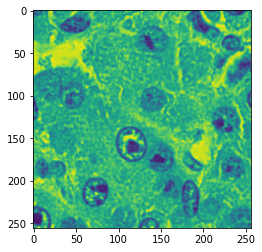

In [30]:
# Explore metrics for the ideal weighted ensemble model. 
import matplotlib.pyplot as plt
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [.3, .1,.6] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)



i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
print("True Label: ", class_names[np.argmax(y_test[i])])



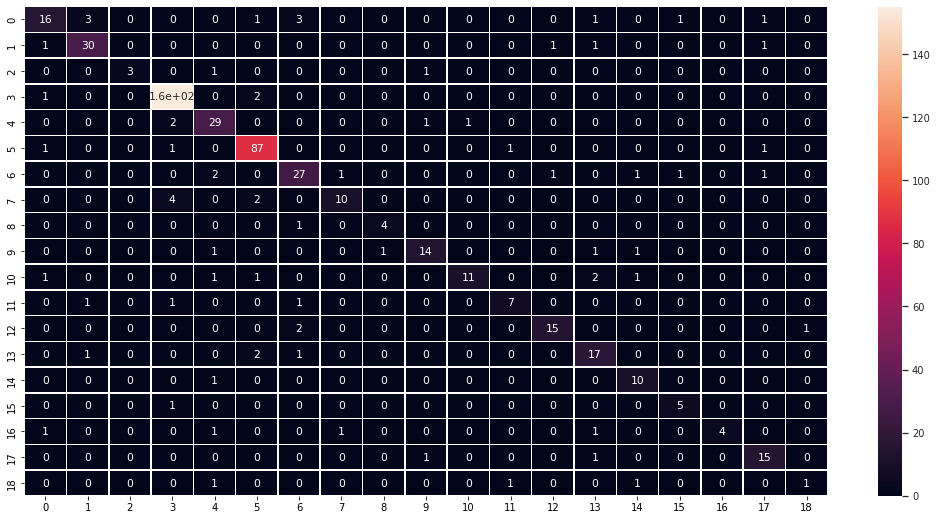

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1 ), ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(18,9))
sns.set(font_scale=0.9)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

**Ensembling resNet50 and vgg19**

In [32]:
model1 = load_model('resNet50-fold1.h5')
model2 = load_model('vgg19-fold1.h5')
models = [model1, model2] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

In [33]:
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(x_test)
prediction2 = model2.predict(x_test)

accuracy1 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction1, axis=1))
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction2, axis= 1))



ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)


print('Accuracy Score for average ensemble = ', ensemble_accuracy)
#Weighted average ensemble
models = [model1, model2] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)

weights = [.7,.3] 

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), weighted_ensemble_prediction)
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)

print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.6428571428571429
Accuracy Score for model2 =  0.43609022556390975
Accuracy Score for average ensemble =  0.599624060150376
Accuracy Score for model1 =  0.6428571428571429
Accuracy Score for model2 =  0.43609022556390975
Accuracy Score for average ensemble =  0.599624060150376
Accuracy Score for weighted average ensemble =  0.6447368421052632


In [34]:
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2]
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
            wts = [w1/10.,w2/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)
            
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[0], " obained with w1=", max_acc_row[1],
      " w2=", max_acc_row[2])         


Max accuracy of  0.4  obained with w1= 0.1  w2= 64.66165413533834


Predicted Label:  Kidney
True Label:  Bile duct


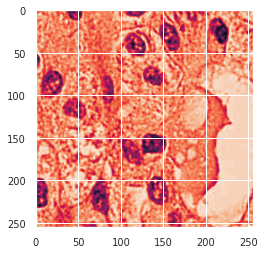

In [37]:
# Explore metrics for the ideal weighted ensemble model. 
import matplotlib.pyplot as plt
models = [model1, model2]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [.7,.3] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)



i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
print("True Label: ", class_names[np.argmax(y_test[i])])



**Ensembling Vgg19 and vgg16**

In [38]:
model1 = load_model('resNet50-fold1.h5')
model3 = load_model('vgg16-fold1.h5')
models = [model1, model3] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

In [40]:
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(x_test)
prediction3 = model3.predict(x_test)

accuracy1 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction1, axis=1))
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction3, axis= 1))



ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model3 = ', accuracy3)


print('Accuracy Score for average ensemble = ', ensemble_accuracy)
#Weighted average ensemble
models = [model1, model3] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)

weights = [.7,.3] 

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), weighted_ensemble_prediction)
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model3 = ', accuracy3)

print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.6428571428571429
Accuracy Score for model3 =  0.8590225563909775
Accuracy Score for average ensemble =  0.8721804511278195
Accuracy Score for model1 =  0.6428571428571429
Accuracy Score for model3 =  0.8590225563909775
Accuracy Score for average ensemble =  0.8721804511278195
Accuracy Score for weighted average ensemble =  0.7913533834586466


In [41]:
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model3]
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
            wts = [w1/10.,w2/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)
            
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[0], " obained with w1=", max_acc_row[1],
      " w3=", max_acc_row[2])         


Max accuracy of  0.1  obained with w1= 0.1  w3= 87.21804511278195


In [42]:
#Weighted average ensemble
models = [model1, model3] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)

weights = [.2,.8] 

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), weighted_ensemble_prediction)
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model3 = ', accuracy3)

print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.6428571428571429
Accuracy Score for model3 =  0.8590225563909775
Accuracy Score for average ensemble =  0.8721804511278195
Accuracy Score for weighted average ensemble =  0.8609022556390977


Predicted Label:  Breast
True Label:  Breast


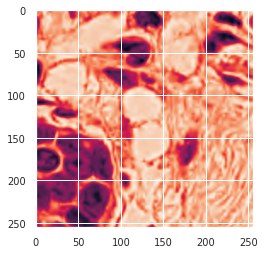

In [44]:
# Explore metrics for the ideal weighted ensemble model. 
import matplotlib.pyplot as plt
models = [model1, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [.4,.6] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)



i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
print("True Label: ", class_names[np.argmax(y_test[i])])



In [45]:
model2 = load_model('vgg19-fold1.h5')
model3 = load_model('vgg16-fold1.h5')
models = [model2, model3] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

In [46]:
ensemble_prediction = np.argmax(summed, axis=1)

prediction2 = model2.predict(x_test)
prediction3 = model3.predict(x_test)

accuracy2 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction2, axis=1))
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction3, axis= 1))



ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model2 = ', accuracy1)
print('Accuracy Score for model3 = ', accuracy3)


print('Accuracy Score for average ensemble = ', ensemble_accuracy)
#Weighted average ensemble
models = [model2, model3] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)

weights = [.4,.6] 

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), weighted_ensemble_prediction)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)

print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model2 =  0.6428571428571429
Accuracy Score for model3 =  0.8590225563909775
Accuracy Score for average ensemble =  0.8552631578947368
Accuracy Score for model2 =  0.43609022556390975
Accuracy Score for model3 =  0.8590225563909775
Accuracy Score for average ensemble =  0.8552631578947368
Accuracy Score for weighted average ensemble =  0.8627819548872181


In [47]:
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model2, model3]
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
            wts = [w1/10.,w2/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)
            
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[0], " obained with w2=", max_acc_row[1],
      " w3=", max_acc_row[2])         


Max accuracy of  0.3  obained with w2= 0.4  w3= 86.65413533834587


Predicted Label:  Bile duct
True Label:  Bile duct


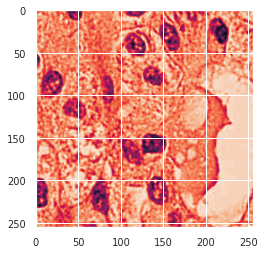

In [48]:
# Explore metrics for the ideal weighted ensemble model. 
import matplotlib.pyplot as plt
models = [model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [.4,.6] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)



i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
print("True Label: ", class_names[np.argmax(y_test[i])])

